#Application of Recommender System Using Collaborative Filtering in Python

**By Reza Septian Pradana**


In this project, a simple recommender system will be built by calculating the correlation matrix between the ratings of each movies and other movies to see the similarities or relationships between movies. MovieLens Dataset will be used which consists of two data files, namely movies rating data and a description of the movies.

#Import Library

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

**Import Film Dataset**

In [38]:
df = pd.read_csv('file.csv', sep = ',', 
                 names = ['user_id', 'item_id', 'rating', 'timestamp'])
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


From the table above, it can be seen that the rating data consists of 4 columns, namely user_id, item_id, rating, and timestamp. Each line represents 1 rating that has been given by a user to a movie that has been watched. The user_id column is the user who gives the rating, item_id is the ID of the movie the user is watching. The rating states the rating value that the user gave for the movie, where the rating given is in the range of 1 to 5, and the timestamp states the time the user gave the rating.

From the table, only the ID of the movie can be known without knowing the title of the movie. For that, it is necessary to import the movie_ID data and combine it with the rating data using merge().

#Import Dataset Movie_Id_Titles

In [39]:
movie_id = pd.read_csv('Movie_Id_Titles.csv')
movie_id

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


#Merge item_id with movie_id Table

In [40]:
data = pd.merge(df, movie_id, on = 'item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


#Data Exploration

In [41]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(20)

title
They Made Me a Criminal (1939)                            5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Saint of Fort Washington, The (1993)                      5.000000
Someone Else's America (1995)                             5.000000
Star Kid (1997)                                           5.000000
Great Day in Harlem, A (1994)                             5.000000
Aiqing wansui (1994)                                      5.000000
Santa with Muscles (1996)                                 5.000000
Prefontaine (1997)                                        5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Pather Panchali (1955)                                    4.625000
Some Mother's Son (1996)                                  4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Anna (1996)                                               4.500000
Everest (1998)                                          

From the output above, it can be seen that there are 10 movies that get perfect ratings. However, this result is quite biased because the movies can only be watched by 1 user. Though a good film is a film with a high rating and watched by many people.

In [42]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [44]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num_of_ratings'] = data.groupby('title')['rating'].count()
ratings.sort_values(by = 'num_of_ratings', ascending = False)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1



From the output above, it can be seen that the movie Star Wars (1977) is the most popular among users.

#Distribution of Movie Rating from Users

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


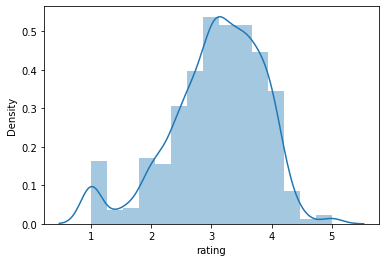

In [45]:
sns.distplot(ratings['rating'], bins = 15)

From the plot, it can be seen that the rating data spreads following a normal distribution with a mean of about 3.5.

# Building a Recommender System By Calculating Correlation Values ​​Between Movies

**Pivot Table user id, title, and rating**

Before calculating the correlation value between movies that a user has watched and other movies, it is necessary to create a pivot table that contains details of the rating that has been given by the user for all movies that have been watched. If the movie has never been watched or has never been rated, the value will be equal to 0.

In [46]:
moviemat = data.pivot_table(index = 'user_id', columns = 'title', values = 'rating').fillna(0)
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After the table above is obtained, coorwith() can be used to calculate the correlation value of a movie that a user has watched with other movies that have never even been watched.


For example, you will find out what movies will be recommended if a user previously watched the movie "Star Wars (1977)".

**Recommended movies based on movie title**

In [47]:
liked_movies = 'Star Wars (1977)'

liked_movies_ratings = moviemat[liked_movies]
liked_movies_ratings

user_id
0      5.0
1      5.0
2      5.0
3      0.0
4      5.0
      ... 
939    0.0
940    4.0
941    0.0
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [48]:
similar_movie_liked = moviemat.corrwith(liked_movies_ratings)
df_movie_corr = pd.DataFrame(similar_movie_liked, columns = ['correlation'])
df_movie_corr

,correlation
title,
'Til There Was You (1997),-0.009011
1-900 (1994),-0.009067
101 Dalmatians (1996),0.155314
12 Angry Men (1957),0.212583
187 (1997),-0.034787
...,...
Young Guns II (1990),0.137382
"Young Poisoner's Handbook, The (1995)",-0.002939
Zeus and Roxanne (1997),-0.007807


From the table above, it can be seen that all correlation values ​​between the movie "Star Wars (1977)" and other movies can be seen. The movies that will be recommended are movies that have a positive correlation with the movie "Star Wars (1977)". In order not to draw the wrong conclusion, a column for the number of users who gave the movie rating was added.

**Table of Movies Correlation Values ​​With Num of Ratings**

In [49]:
df_movie_corr = df_movie_corr.join(ratings['num_of_ratings'])

In [50]:
df_movie_corr

,correlation,num_of_ratings
title,,
'Til There Was You (1997),-0.009011,9
1-900 (1994),-0.009067,5
101 Dalmatians (1996),0.155314,109
12 Angry Men (1957),0.212583,125
187 (1997),-0.034787,41
...,...,...
Young Guns II (1990),0.137382,44
"Young Poisoner's Handbook, The (1995)",-0.002939,41
Zeus and Roxanne (1997),-0.007807,6


To get the 10 most recommended movies based on their correlation values, the correlation column is ordered in descending order first.

**Top 10 Recommended Movies**

In [55]:
movie_recom = df_movie_corr.sort_values(by='correlation', ascending = False).iloc[1:].head(10)
movie_recom

,correlation,num_of_ratings
title,,
Return of the Jedi (1983),0.746797,507
"Empire Strikes Back, The (1980)",0.555233,368
Raiders of the Lost Ark (1981),0.540455,420
Indiana Jones and the Last Crusade (1989),0.467523,331
Toy Story (1995),0.456219,452
"Terminator, The (1984)",0.437866,301
Back to the Future (1985),0.419493,350
Alien (1979),0.412516,291
"Princess Bride, The (1987)",0.411505,324
